In [21]:
import h5py
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import faraday as fd

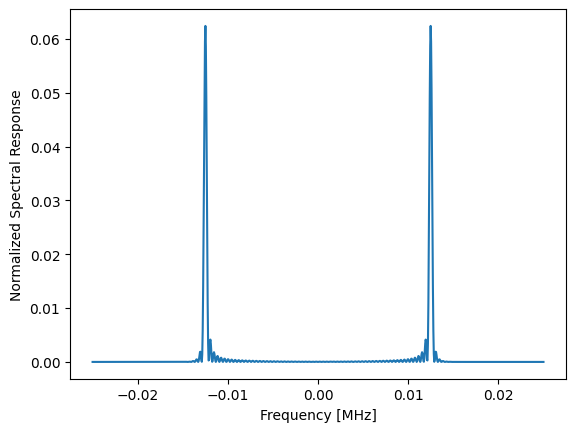

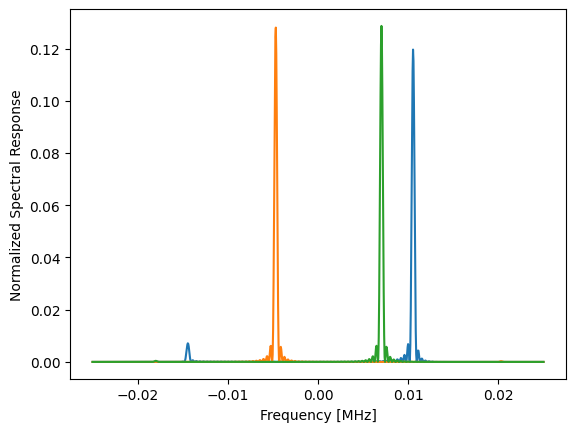

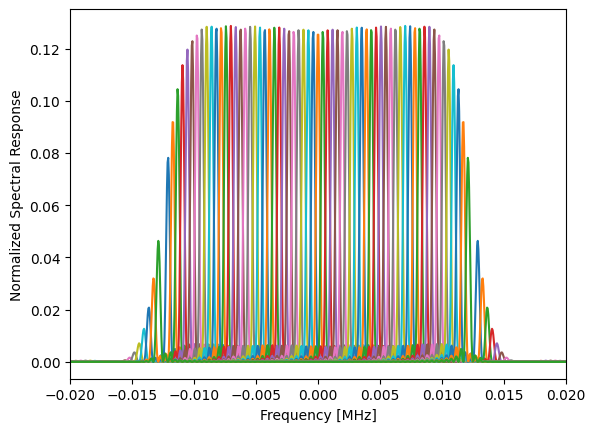

In [22]:
NSIDE = 64

spec_path = "/home/christian/Documents/research/lusee/faraday/data/zoom_response_4tap.txt"
spec = np.loadtxt(spec_path)[500:1500]
offset = spec[:, 0] / 1e3
spec = spec[:, 1:] / spec[:, 1:].sum(axis=0, keepdims=True)
wide_bin = spec[:, 0]
spec = spec[:, 1:]

plt.figure()
plt.plot(offset, spec[:, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(offset, spec[:, -5])
plt.plot(offset, spec[:, 20])
plt.plot(offset, spec[:, 50])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(offset, spec[:, 1:])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.xlim(-20/1e3, 20/1e3)
plt.show()

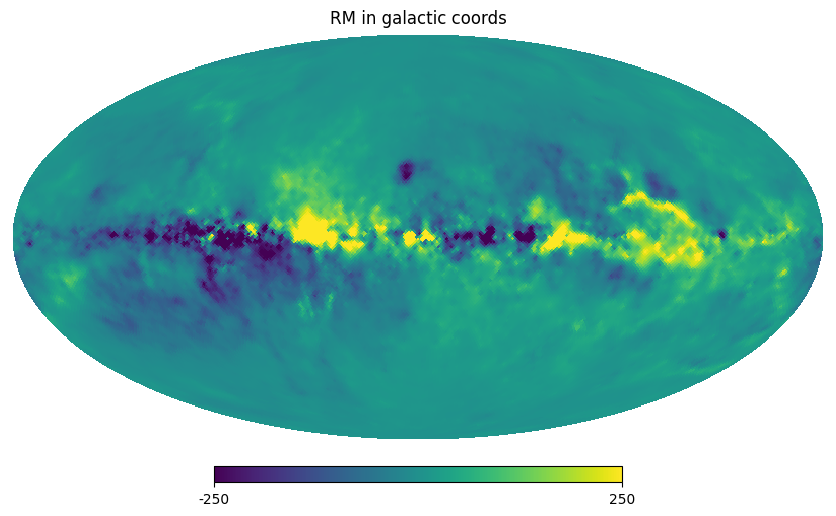

In [24]:
# add faraday rotation
with h5py.File("../data/faraday2020v2.hdf5", "r") as f:
    f_depth = f["faraday_sky_mean"][:]  # faraday depth

f_depth = hp.ud_grade(f_depth, NSIDE)
hp.mollview(rm, cbar=True, min=-250, max=250, title="RM in galactic coords")

In [25]:
def load_sky(sim_freqs, faraday=False, rm=f_depth):
    sky = fd.Sky.wmap(nside=NSIDE)
    # scale the sky to the sim freqs
    sky.stokes = sky.stokes * (sim_freqs[None, :, None]/23e3) ** (-2.5)
    
    if faraday:
        P = sky.stokes[1] + 1j * sky.stokes[2]  # q + iu
        chi = fd.sky.pol_angle(sim_freqs[:, None], rm[None])
        P_rot = P * np.exp(1j * 2 * chi)
        sky.stokes[1] = P_rot.real
        sky.stokes[2] = P_rot.imag
    
    return sky

## 30 MHz

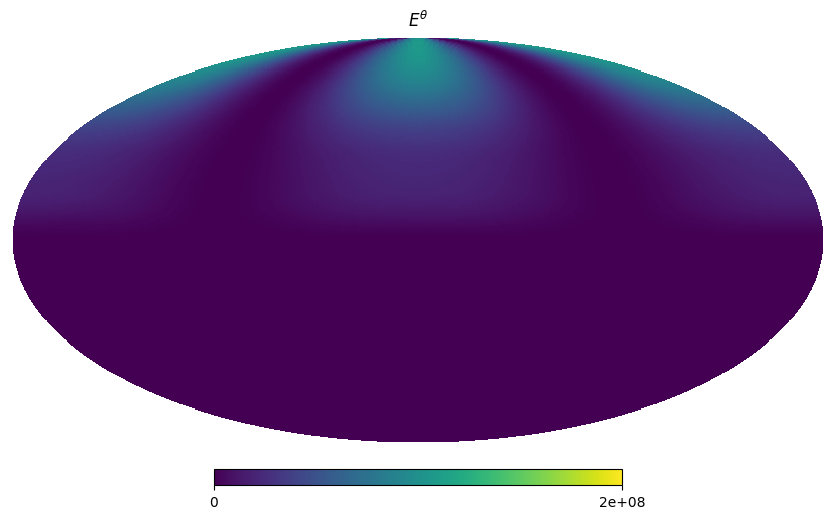

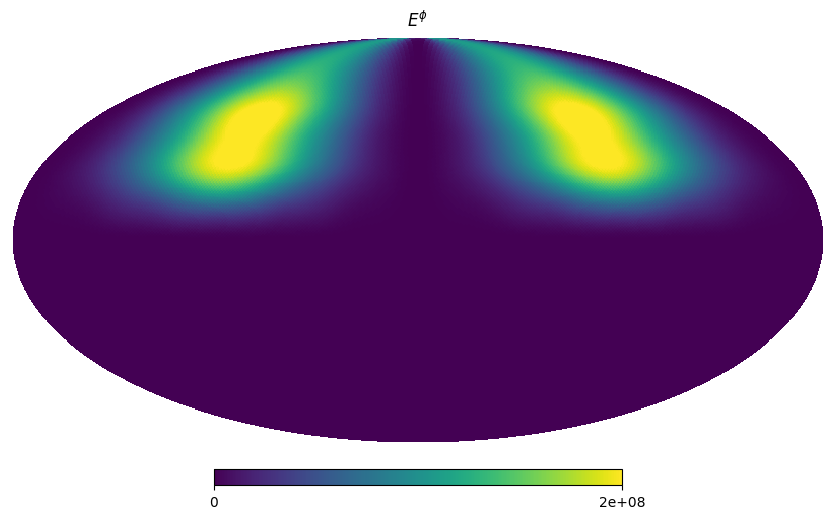

In [26]:
CENTER_FREQ = 30

beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits", frequency=CENTER_FREQ, nside=NSIDE)
hp.mollview(np.abs(beam.beam_X[0, 0])**2, title="$E^{\\theta}$", min=0, max=2e8)
hp.mollview(np.abs(beam.beam_X[1, 0])**2, title="$E^{\\phi}$", min=0, max=2e8)

### Narrow

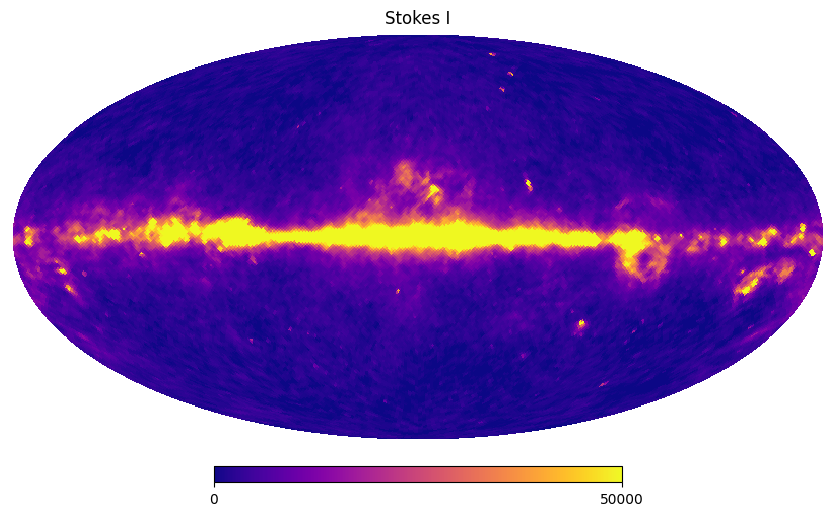

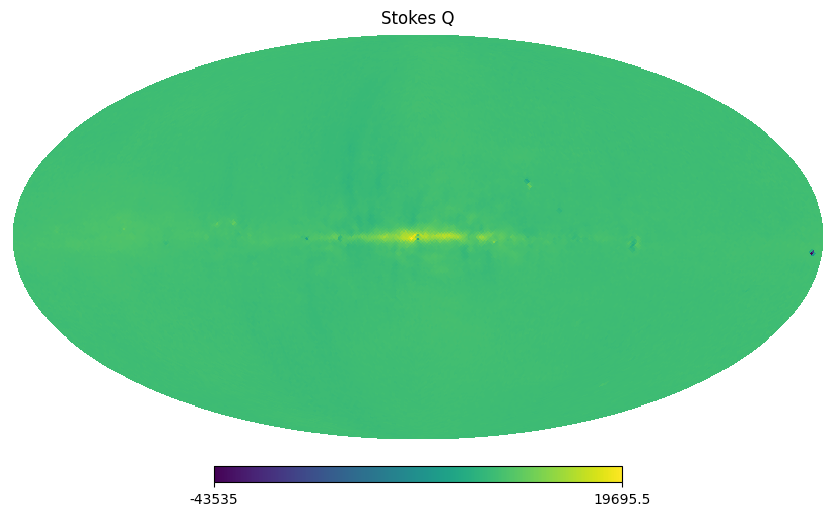

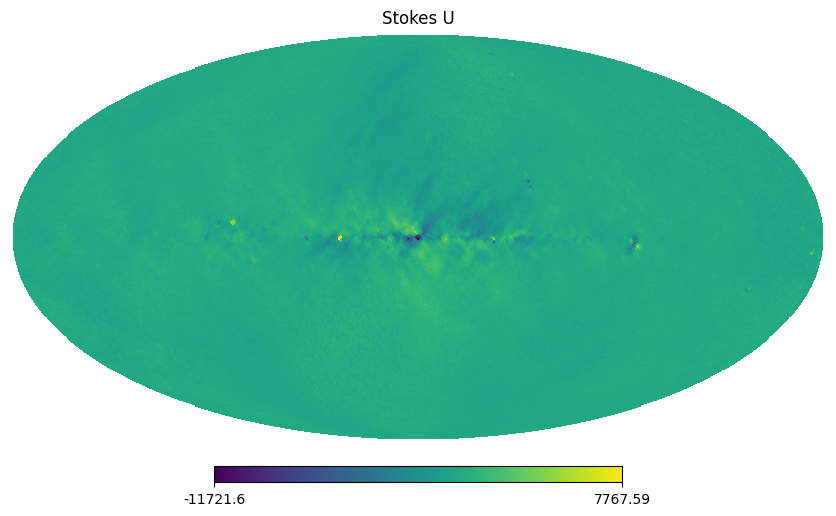

In [27]:
sim_freq = offset + CENTER_FREQ
# these are the ouput channels after  convolution (64 chans)
off_max = offset[spec.argmax(axis=0)]
freq = CENTER_FREQ + off_max

sky = load_sky(sim_freq, faraday=False)

hp.mollview(sky.stokes[0, 0], cbar=True, title="Stokes I", min=0, max=5e4, cmap="plasma")  # I
hp.mollview(sky.stokes[1, 0], cbar=True, title="Stokes Q")  # Q
hp.mollview(sky.stokes[2, 0], cbar=True, title="Stokes U")  # U

Running time 1/56, 2.0275026443753323 rad
Running time 2/56, 2.1315461790198365 rad
Running time 3/56, 2.2349553379617757 rad
Running time 4/56, 2.3377450129168817 rad
Running time 5/56, 2.4399902968044627 rad
Running time 6/56, 2.5418276793062713 rad
Running time 7/56, 2.643454574858512 rad
Running time 8/56, 2.7451277296078906 rad
Running time 9/56, 2.8471609282969785 rad
Running time 10/56, 2.9499222002787913 rad
Running time 11/56, 3.053830420696005 rad
Running time 12/56, 3.1593508225331273 rad
Running time 13/56, 3.2669884745205278 rad
Running time 14/56, 3.3772782408108104 rad
Running time 15/56, 3.4907691550700557 rad
Running time 16/56, 3.6080006255100727 rad
Running time 17/56, 3.729467692280775 rad
Running time 18/56, 3.8555731447359634 rad
Running time 19/56, 3.986566343395538 rad
Running time 20/56, 4.122472753589383 rad
Running time 21/56, 4.263024574191116 rad
Running time 22/56, 4.407610027129801 rad
Running time 23/56, 4.555263203557271 rad
Running time 24/56, 4.704712

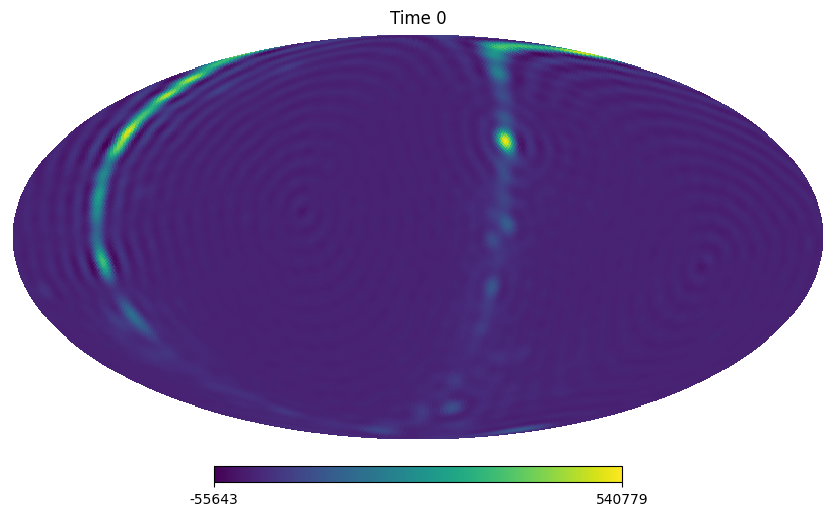

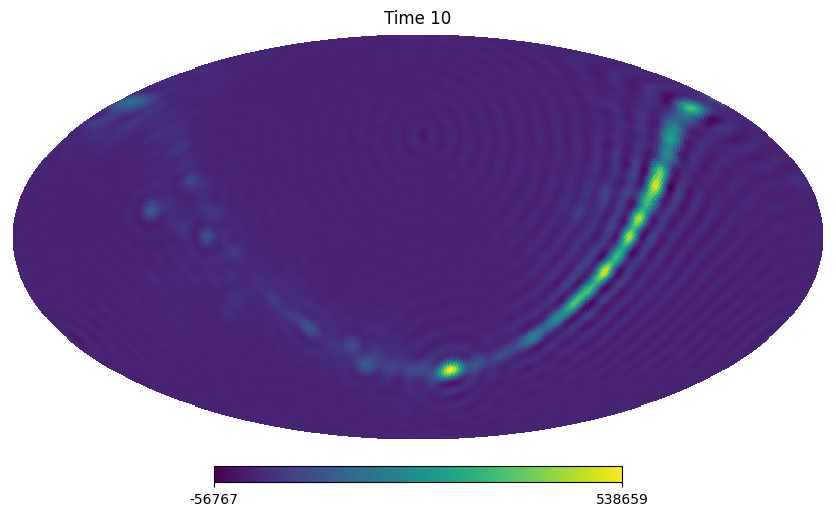

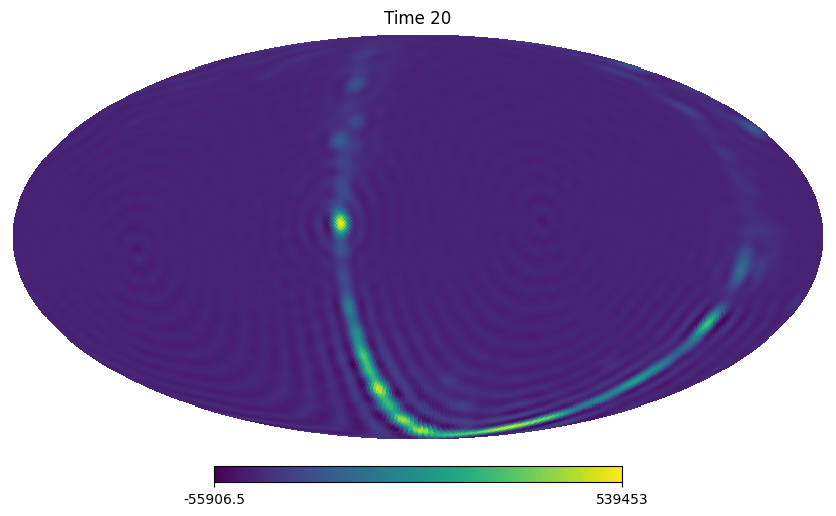

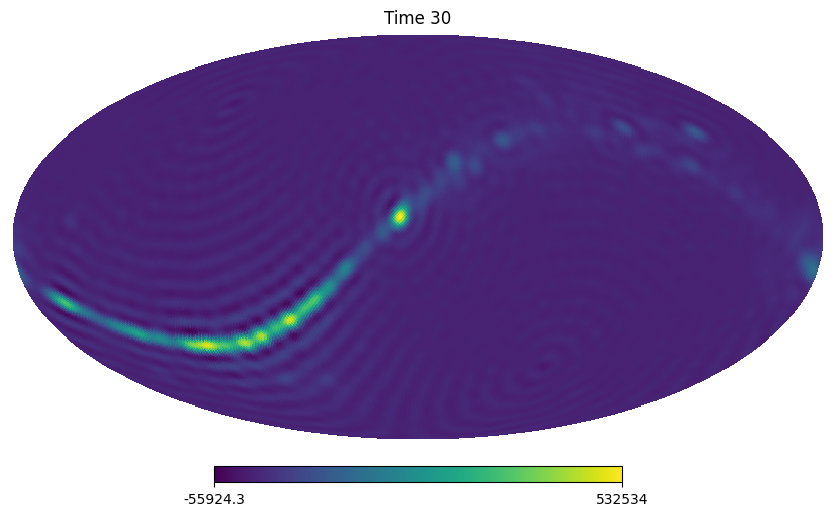

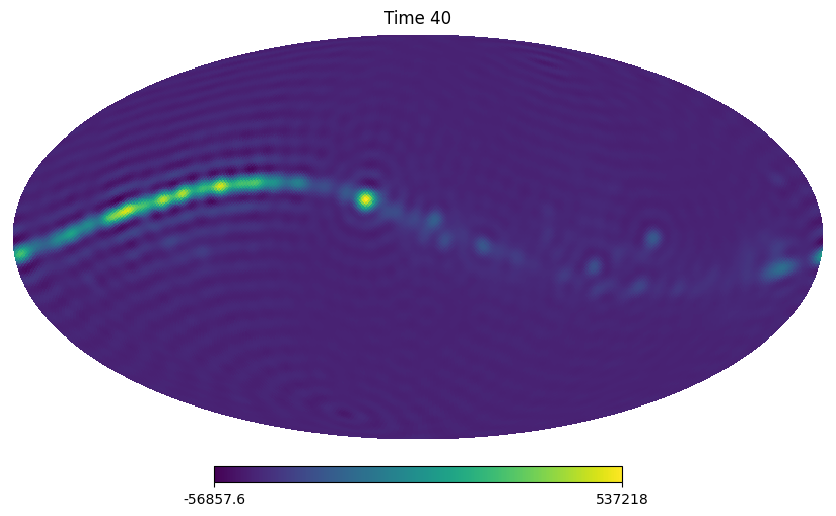

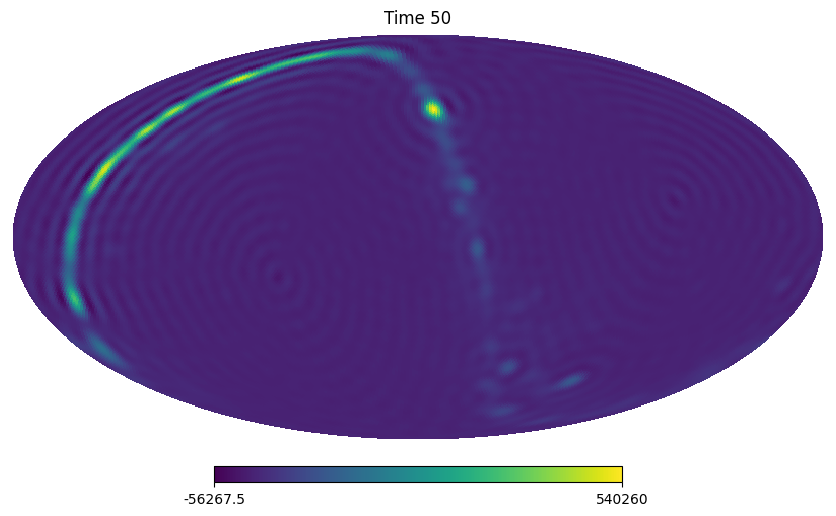

In [14]:
sim = fd.faraday.Simulator(beam, sky, center_freq=CENTER_FREQ)
sim.run()
sim.channelize(bins="narrow")

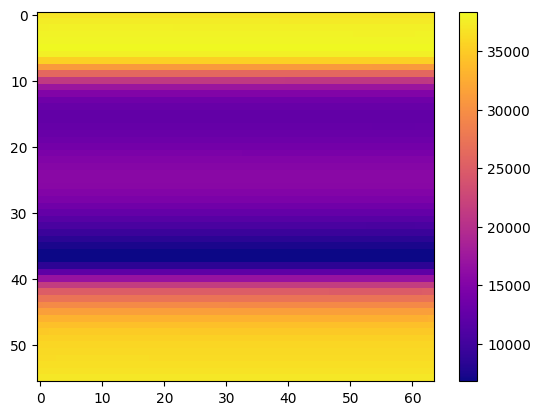

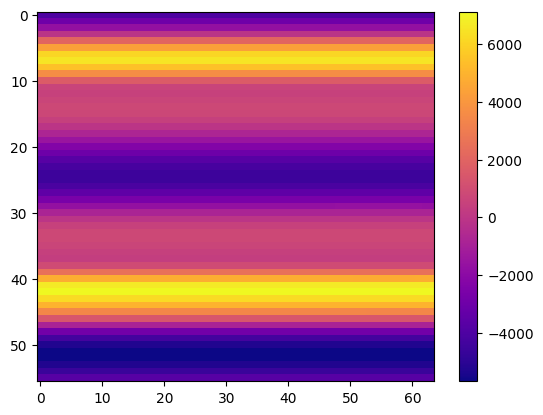

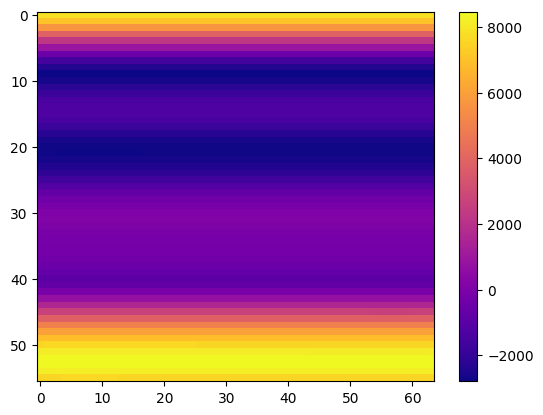

In [15]:
plt.figure()
plt.imshow(sim.vis["XX"] + sim.vis["YY"], aspect="auto", cmap="plasma")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(sim.vis["XX"] - sim.vis["YY"], aspect="auto", cmap="plasma")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(2 * np.real(sim.vis["XY"]), aspect="auto", cmap="plasma")
plt.colorbar()
plt.show()

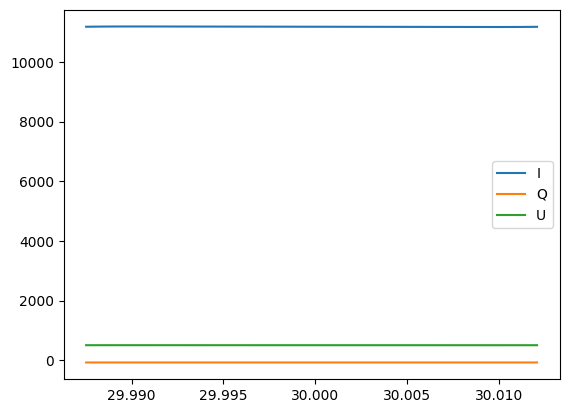

In [28]:
sim.vis2stokes()

plt.figure()
for k, v in sim.stokes.items():
    plt.plot(freq, v.mean(axis=0), label=k)
plt.legend()
plt.show()

Running time 1/56, 2.0275026443753323 rad
Running time 2/56, 2.1315461790198365 rad
Running time 3/56, 2.2349553379617757 rad
Running time 4/56, 2.3377450129168817 rad
Running time 5/56, 2.4399902968044627 rad
Running time 6/56, 2.5418276793062713 rad
Running time 7/56, 2.643454574858512 rad
Running time 8/56, 2.7451277296078906 rad
Running time 9/56, 2.8471609282969785 rad
Running time 10/56, 2.9499222002787913 rad
Running time 11/56, 3.053830420696005 rad
Running time 12/56, 3.1593508225331273 rad
Running time 13/56, 3.2669884745205278 rad
Running time 14/56, 3.3772782408108104 rad
Running time 15/56, 3.4907691550700557 rad
Running time 16/56, 3.6080006255100727 rad
Running time 17/56, 3.729467692280775 rad
Running time 18/56, 3.8555731447359634 rad
Running time 19/56, 3.986566343395538 rad
Running time 20/56, 4.122472753589383 rad
Running time 21/56, 4.263024574191116 rad
Running time 22/56, 4.407610027129801 rad
Running time 23/56, 4.555263203557271 rad
Running time 24/56, 4.704712

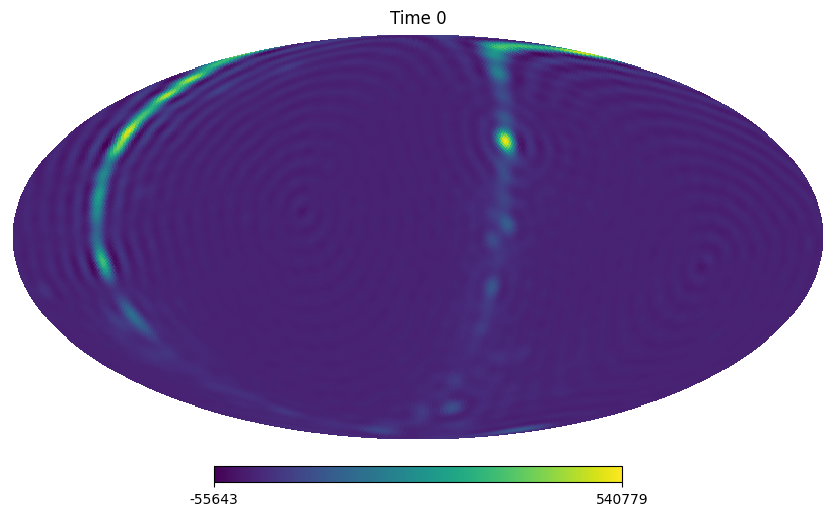

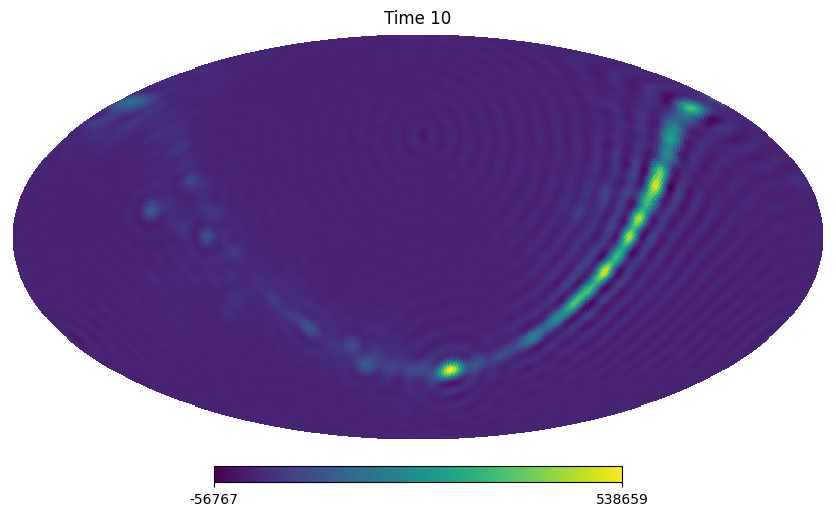

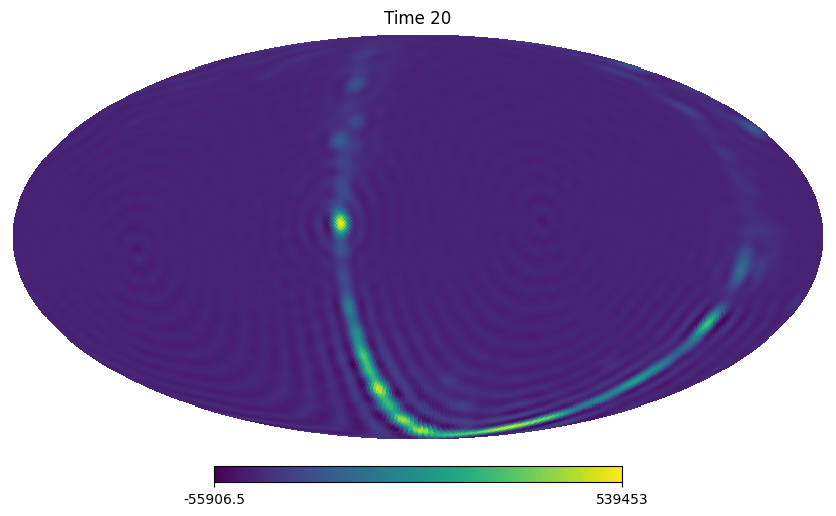

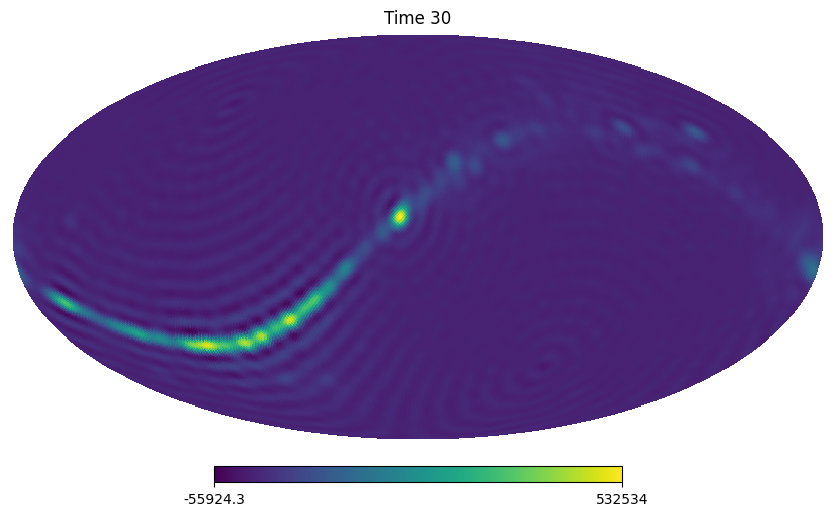

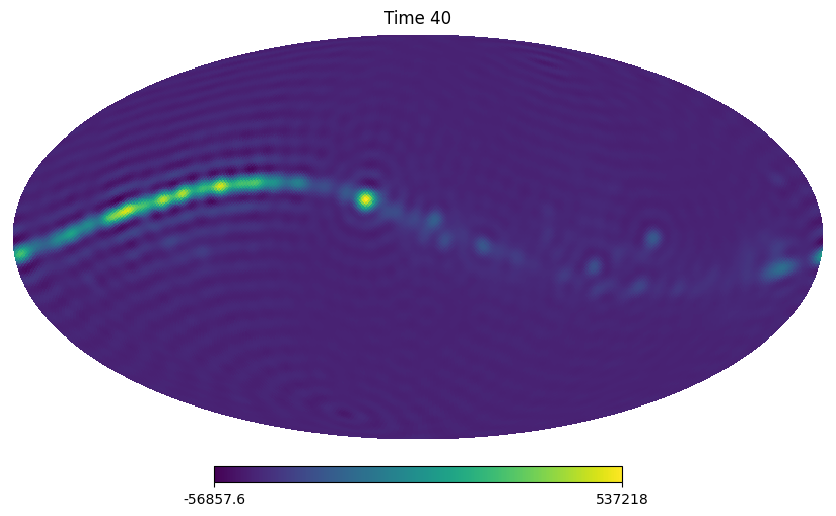

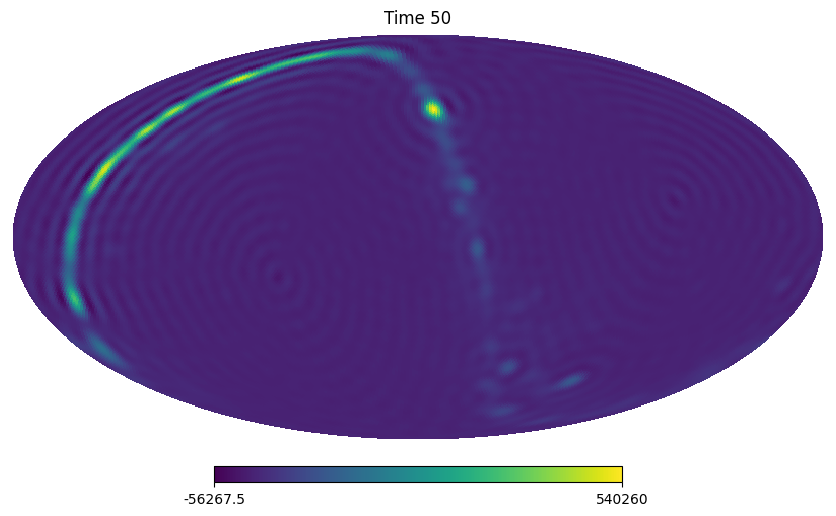

In [34]:
# faraday

sky_fd = load_sky(sim_freq, faraday=True, rm=f_depth)

sim_fd = fd.faraday.Simulator(beam, sky_fd, center_freq=CENTER_FREQ)
sim_fd.run()
sim_fd.channelize(bins="narrow")

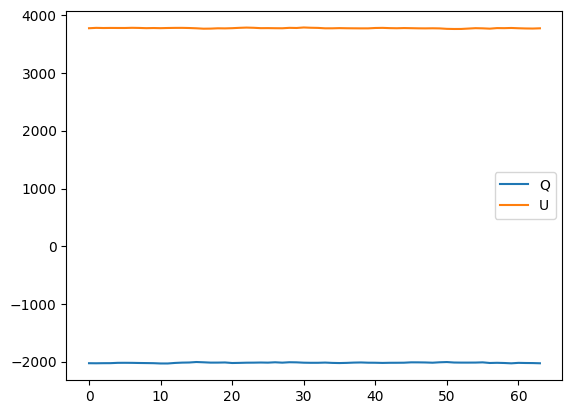

In [35]:
sim_fd.vis2stokes()

plt.figure()
for k, v in sim_fd.stokes.items():
    if k == "I":
        continue
    plt.plot(v[0], label=k)
plt.legend()
plt.show()

0.1592965264334297
-21.808837498252085
0.9802398343519872


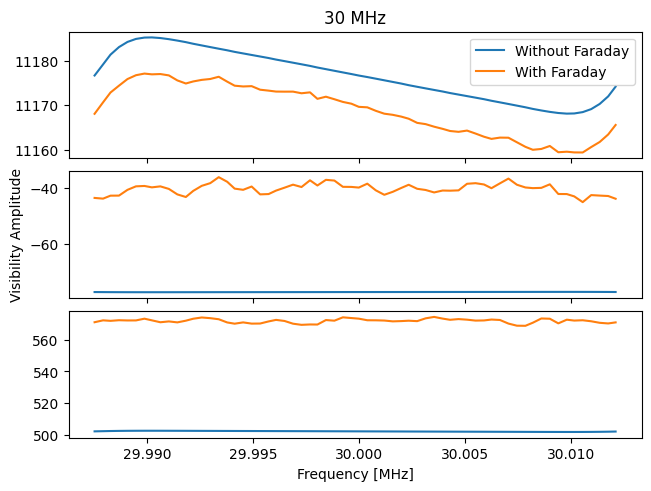

In [47]:
fig, axs = plt.subplots(nrows=3, sharex=True, constrained_layout=True)
for ax, pol in zip(axs, ["I", "Q", "U"]):
    stoke = sim.stokes[pol].mean(axis=0)
    stoke_fd = sim_fd.stokes[pol].mean(axis=0)
    ax.plot(freq, stoke, label="Without Faraday")
    ax.plot(freq, stoke_fd, label="With Faraday")
    if pol == "I":
        ax.legend()
        ax.set_title("30 MHz")
    print(100 * (np.max(stoke_fd) - np.min(stoke_fd)) / np.mean(stoke_fd))
    if pol == "Q":
        ax.set_ylabel("Visibility Amplitude")
    if pol == "U":
        ax.set_xlabel("Frequency [MHz]")
plt.show()

## 50 MHz

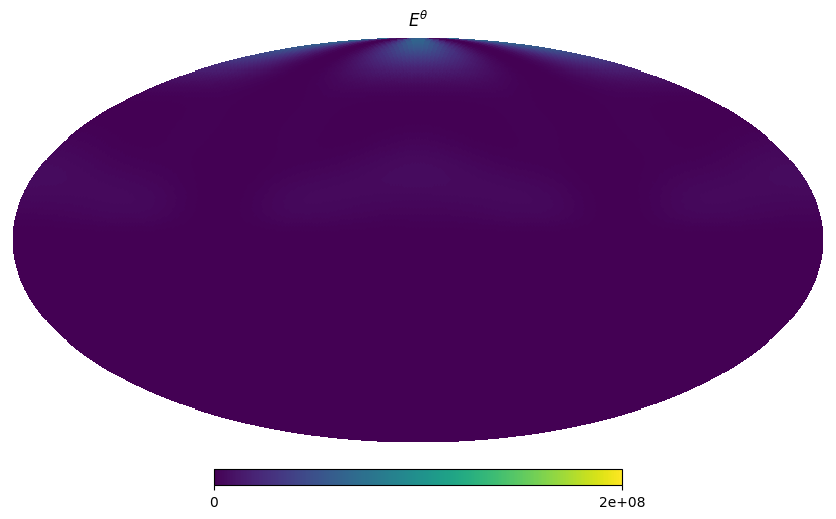

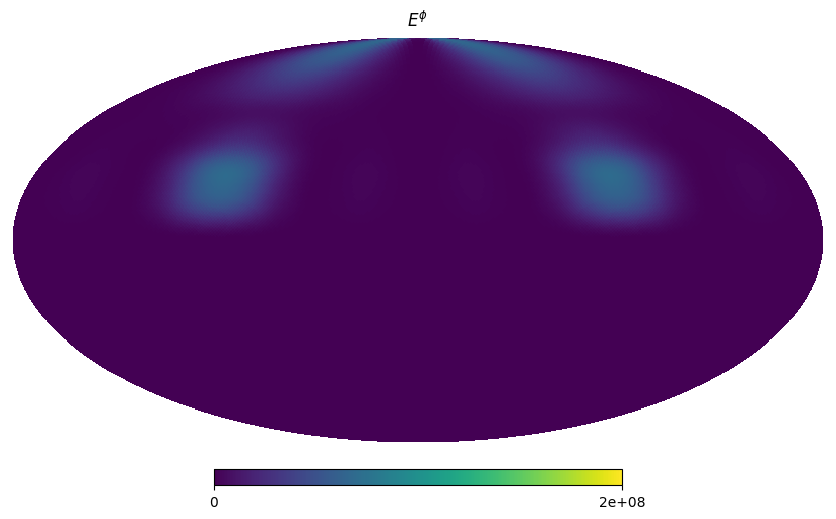

In [48]:
CENTER_FREQ = 50

beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits", frequency=CENTER_FREQ, nside=NSIDE)
hp.mollview(np.abs(beam.beam_X[0, 0])**2, title="$E^{\\theta}$", min=0, max=2e8)
hp.mollview(np.abs(beam.beam_X[1, 0])**2, title="$E^{\\phi}$", min=0, max=2e8)

### Narrow

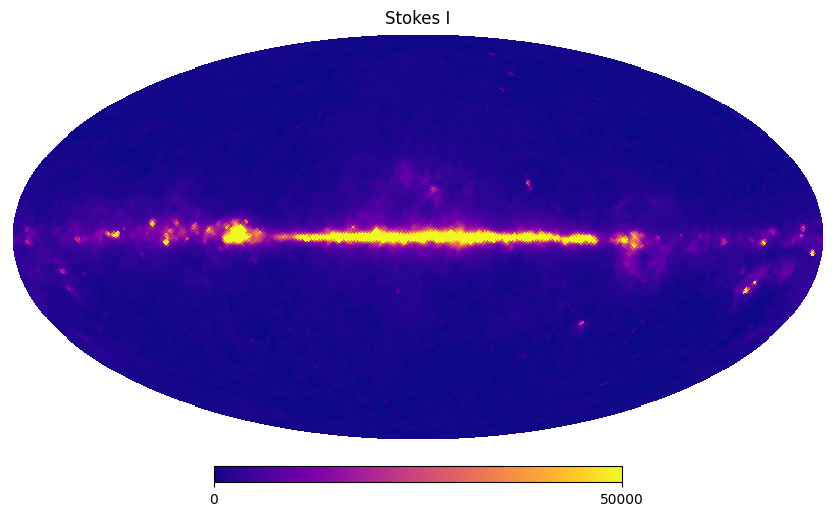

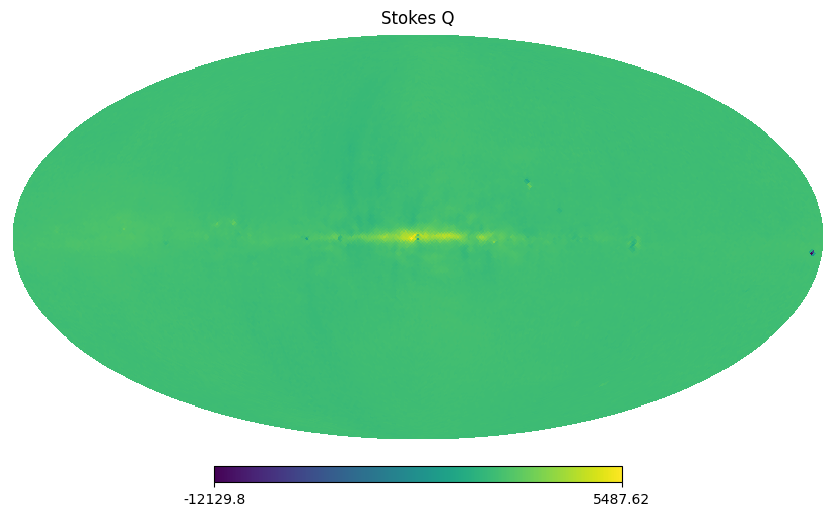

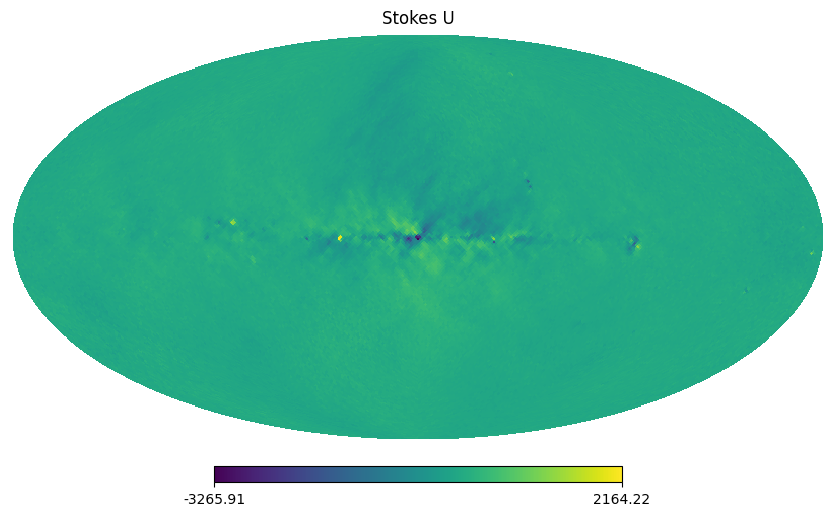

In [49]:
sim_freq = offset + CENTER_FREQ
# these are the ouput channels after  convolution (64 chans)
off_max = offset[spec.argmax(axis=0)]
freq = CENTER_FREQ + off_max

sky = load_sky(sim_freq, faraday=False)

hp.mollview(sky.stokes[0, 0], cbar=True, title="Stokes I", min=0, max=5e4, cmap="plasma")  # I
hp.mollview(sky.stokes[1, 0], cbar=True, title="Stokes Q")  # Q
hp.mollview(sky.stokes[2, 0], cbar=True, title="Stokes U")  # U

Running time 1/56, 2.0275026443753323 rad
Running time 2/56, 2.1315461790198365 rad
Running time 3/56, 2.2349553379617757 rad
Running time 4/56, 2.3377450129168817 rad
Running time 5/56, 2.4399902968044627 rad
Running time 6/56, 2.5418276793062713 rad
Running time 7/56, 2.643454574858512 rad
Running time 8/56, 2.7451277296078906 rad
Running time 9/56, 2.8471609282969785 rad
Running time 10/56, 2.9499222002787913 rad
Running time 11/56, 3.053830420696005 rad
Running time 12/56, 3.1593508225331273 rad
Running time 13/56, 3.2669884745205278 rad
Running time 14/56, 3.3772782408108104 rad
Running time 15/56, 3.4907691550700557 rad
Running time 16/56, 3.6080006255100727 rad
Running time 17/56, 3.729467692280775 rad
Running time 18/56, 3.8555731447359634 rad
Running time 19/56, 3.986566343395538 rad
Running time 20/56, 4.122472753589383 rad
Running time 21/56, 4.263024574191116 rad
Running time 22/56, 4.407610027129801 rad
Running time 23/56, 4.555263203557271 rad
Running time 24/56, 4.704712

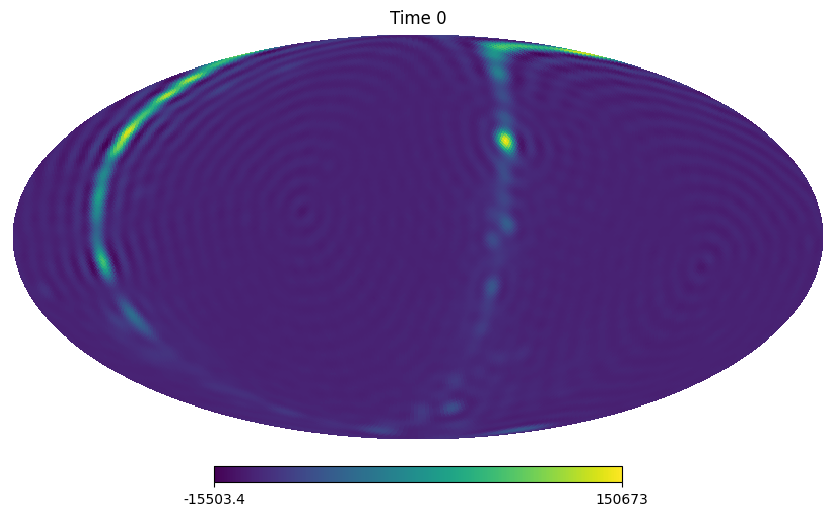

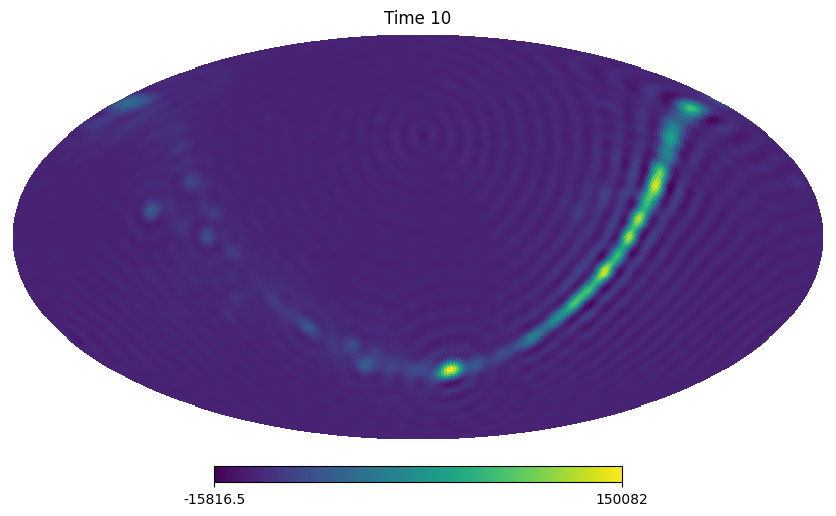

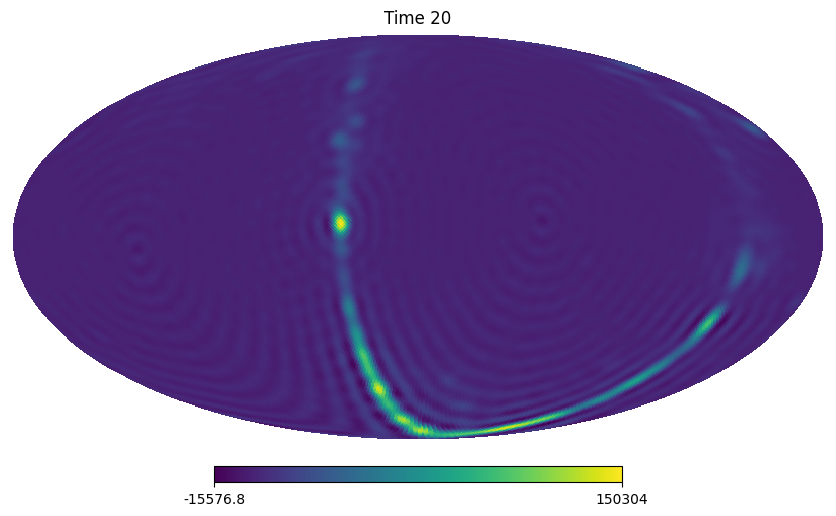

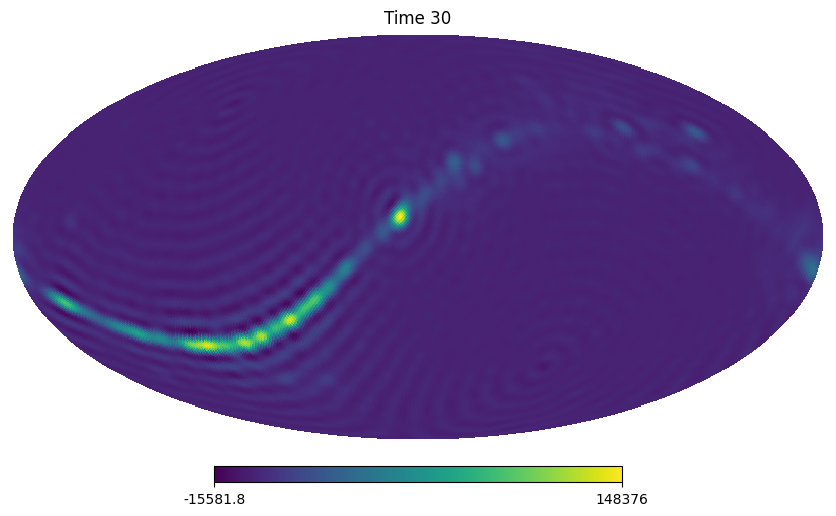

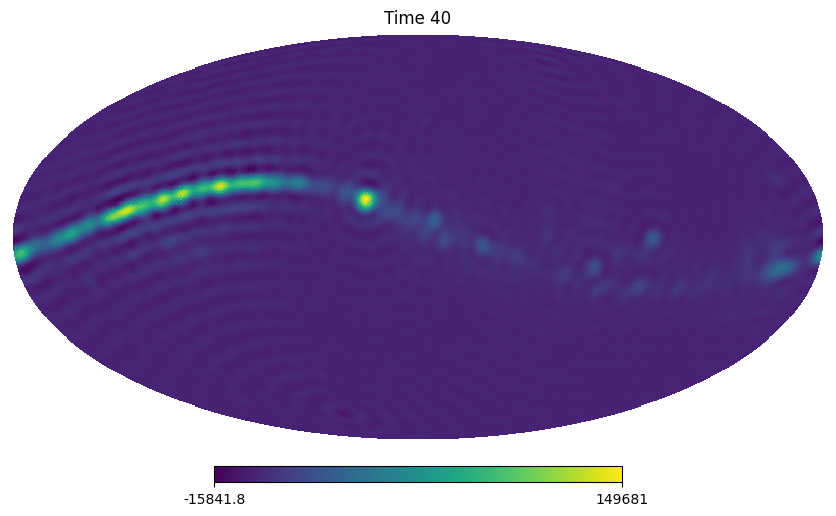

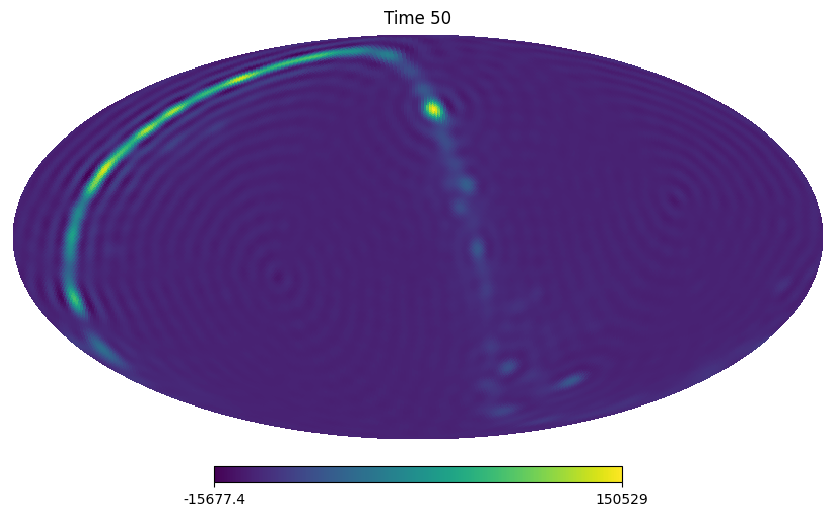

In [50]:
sim = fd.faraday.Simulator(beam, sky, center_freq=CENTER_FREQ)
sim.run()
sim.channelize(bins="narrow")

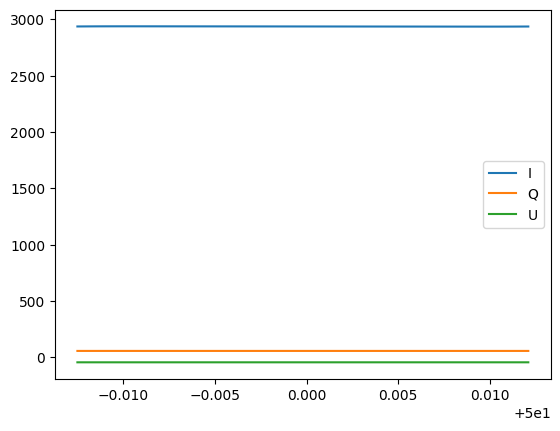

In [52]:
sim.vis2stokes()

plt.figure()
for k, v in sim.stokes.items():
    plt.plot(freq, v.mean(axis=0), label=k)
plt.legend()
plt.show()

Running time 1/56, 2.0275026443753323 rad
Running time 2/56, 2.1315461790198365 rad
Running time 3/56, 2.2349553379617757 rad
Running time 4/56, 2.3377450129168817 rad
Running time 5/56, 2.4399902968044627 rad
Running time 6/56, 2.5418276793062713 rad
Running time 7/56, 2.643454574858512 rad
Running time 8/56, 2.7451277296078906 rad
Running time 9/56, 2.8471609282969785 rad
Running time 10/56, 2.9499222002787913 rad
Running time 11/56, 3.053830420696005 rad
Running time 12/56, 3.1593508225331273 rad
Running time 13/56, 3.2669884745205278 rad
Running time 14/56, 3.3772782408108104 rad
Running time 15/56, 3.4907691550700557 rad
Running time 16/56, 3.6080006255100727 rad
Running time 17/56, 3.729467692280775 rad
Running time 18/56, 3.8555731447359634 rad
Running time 19/56, 3.986566343395538 rad
Running time 20/56, 4.122472753589383 rad
Running time 21/56, 4.263024574191116 rad
Running time 22/56, 4.407610027129801 rad
Running time 23/56, 4.555263203557271 rad
Running time 24/56, 4.704712

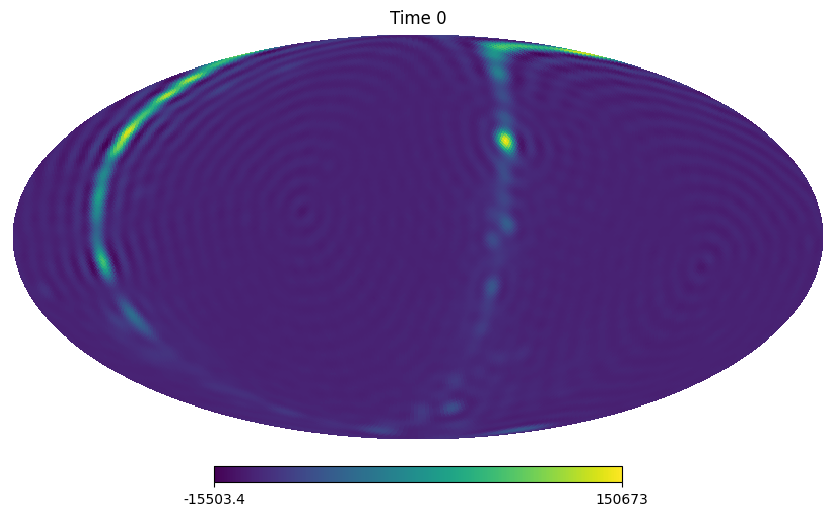

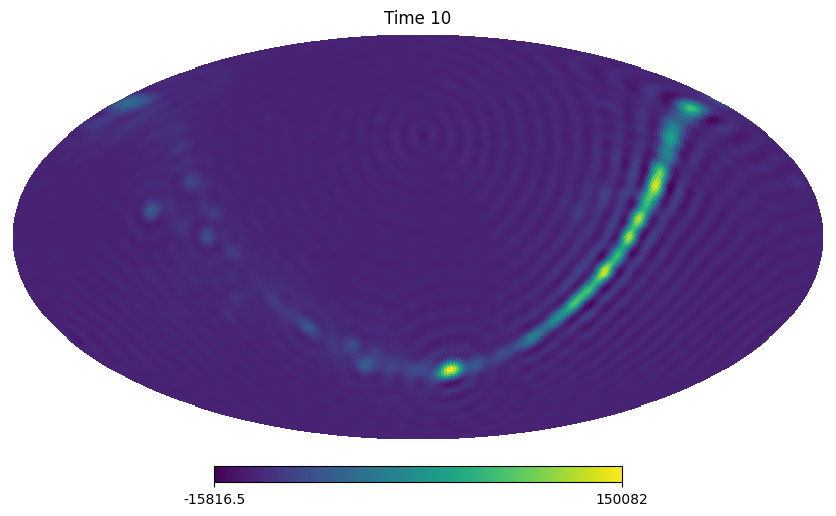

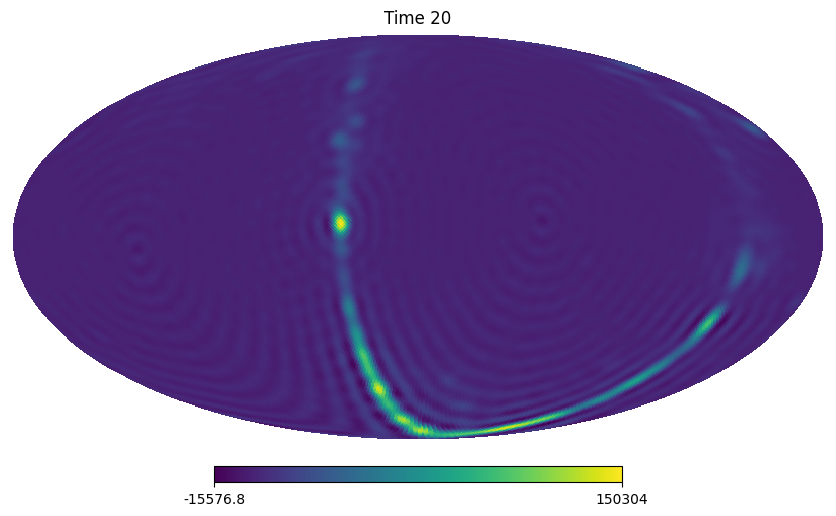

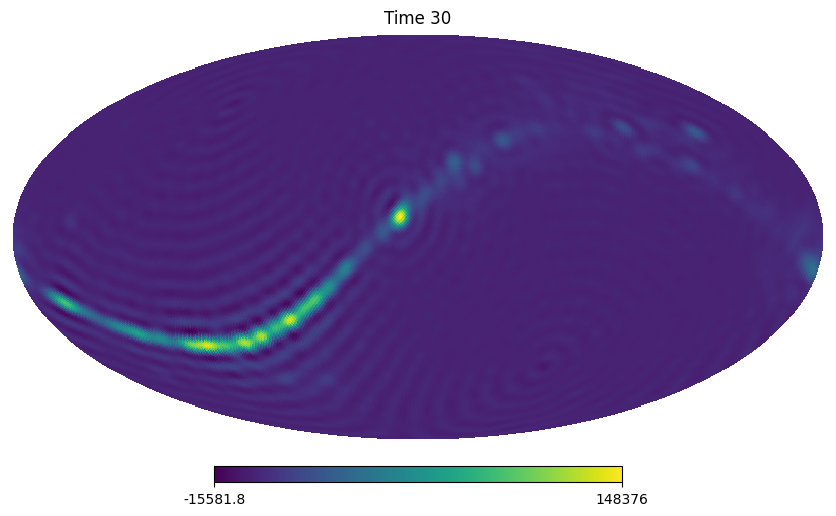

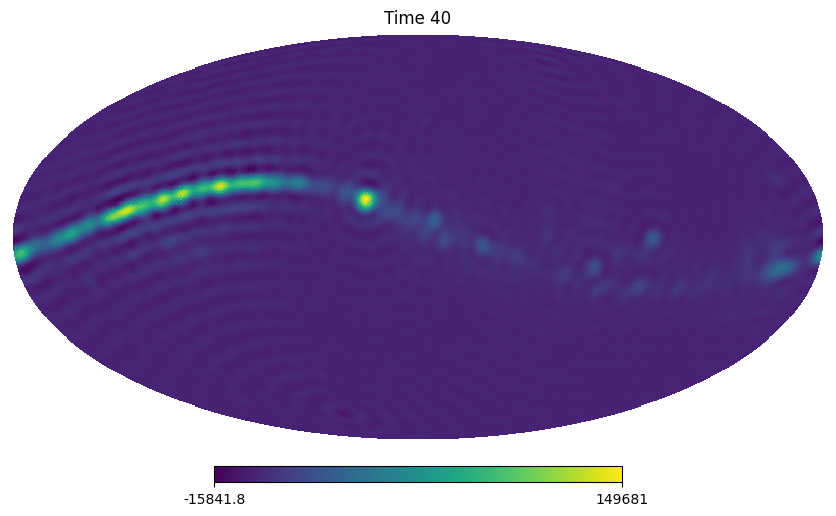

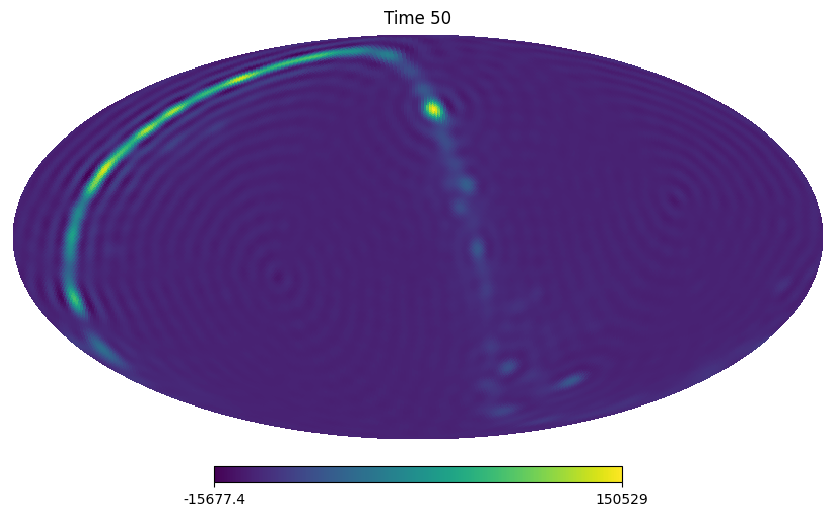

In [53]:
# faraday

sky_fd = load_sky(sim_freq, faraday=True, rm=f_depth)

sim_fd = fd.faraday.Simulator(beam, sky_fd, center_freq=CENTER_FREQ)
sim_fd.run()
sim_fd.channelize(bins="narrow")

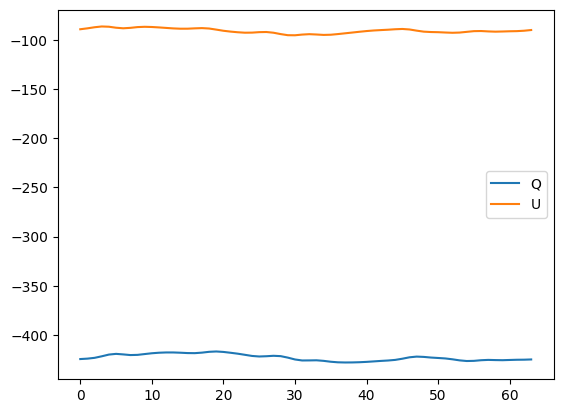

In [54]:
sim_fd.vis2stokes()

plt.figure()
for k, v in sim_fd.stokes.items():
    if k == "I":
        continue
    plt.plot(v[0], label=k)
plt.legend()
plt.show()

0.09152727637124085
3.706803829177408
-3.0984441949218433


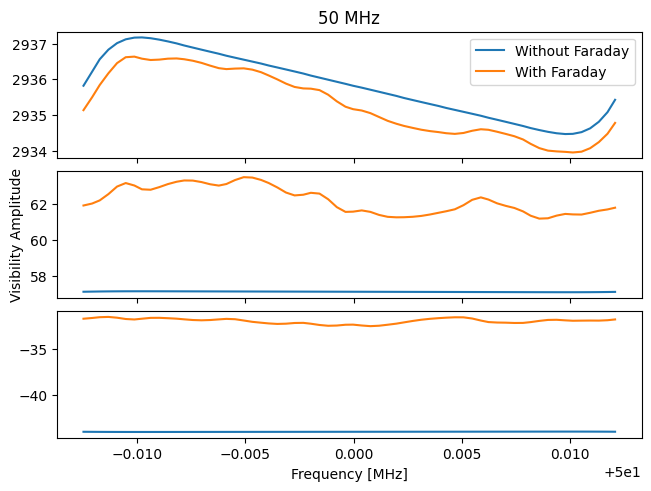

In [55]:
fig, axs = plt.subplots(nrows=3, sharex=True, constrained_layout=True)
for ax, pol in zip(axs, ["I", "Q", "U"]):
    stoke = sim.stokes[pol].mean(axis=0)
    stoke_fd = sim_fd.stokes[pol].mean(axis=0)
    ax.plot(freq, stoke, label="Without Faraday")
    ax.plot(freq, stoke_fd, label="With Faraday")
    if pol == "I":
        ax.legend()
        ax.set_title("50 MHz")
    print(100 * (np.max(stoke_fd) - np.min(stoke_fd)) / np.mean(stoke_fd))
    if pol == "Q":
        ax.set_ylabel("Visibility Amplitude")
    if pol == "U":
        ax.set_xlabel("Frequency [MHz]")
plt.show()

## 10 MHz

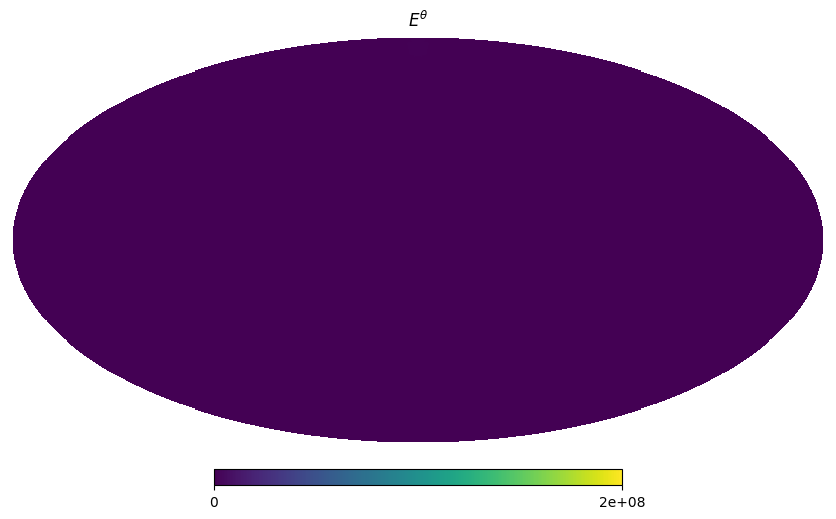

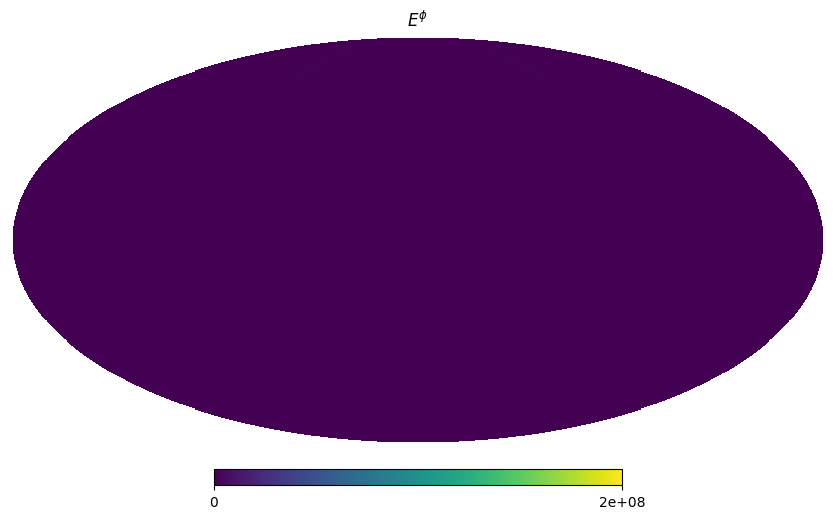

In [56]:
CENTER_FREQ = 10

beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits", frequency=CENTER_FREQ, nside=NSIDE)
hp.mollview(np.abs(beam.beam_X[0, 0])**2, title="$E^{\\theta}$", min=0, max=2e8)
hp.mollview(np.abs(beam.beam_X[1, 0])**2, title="$E^{\\phi}$", min=0, max=2e8)

### Narrow

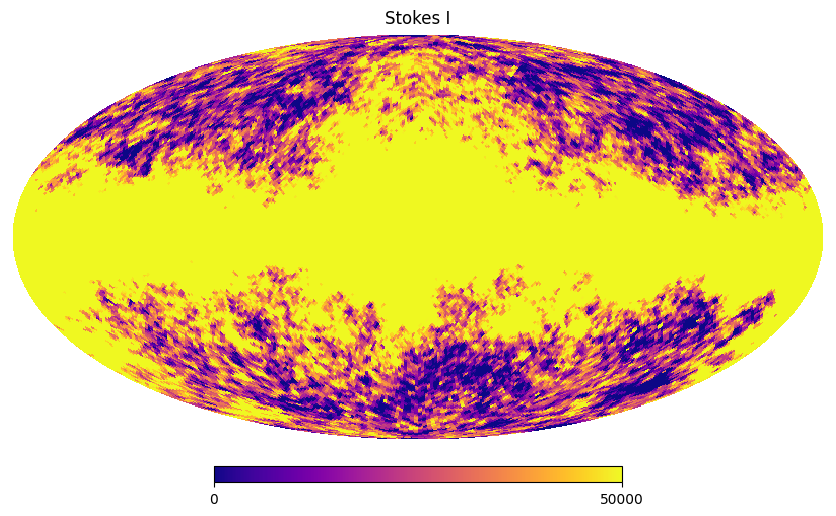

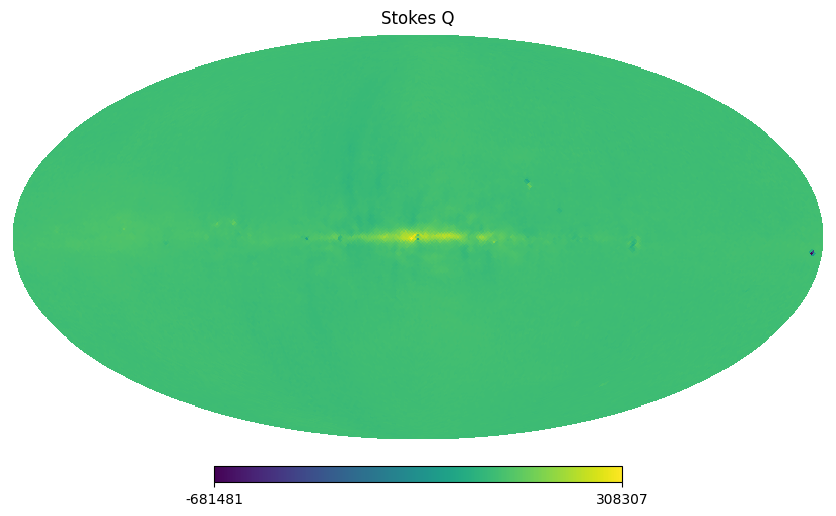

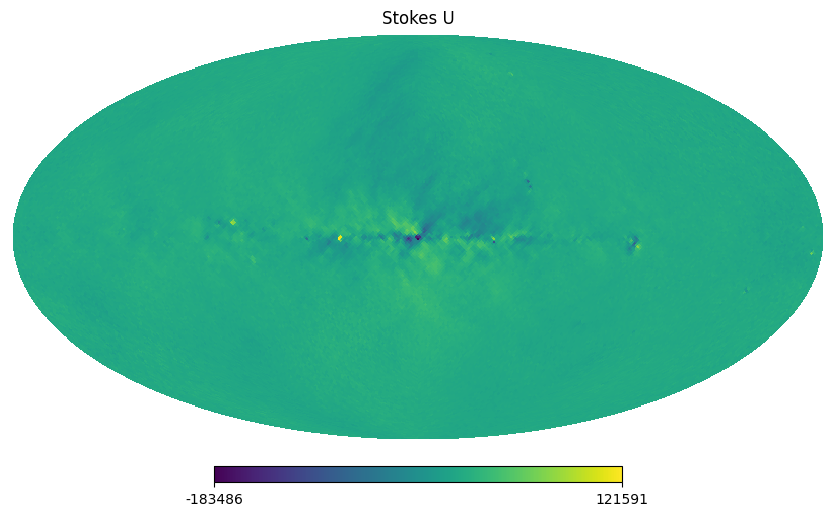

In [57]:
sim_freq = offset + CENTER_FREQ
# these are the ouput channels after  convolution (64 chans)
off_max = offset[spec.argmax(axis=0)]
freq = CENTER_FREQ + off_max

sky = load_sky(sim_freq, faraday=False)

hp.mollview(sky.stokes[0, 0], cbar=True, title="Stokes I", min=0, max=5e4, cmap="plasma")  # I
hp.mollview(sky.stokes[1, 0], cbar=True, title="Stokes Q")  # Q
hp.mollview(sky.stokes[2, 0], cbar=True, title="Stokes U")  # U

Running time 1/1, 2.0275026443753323 rad


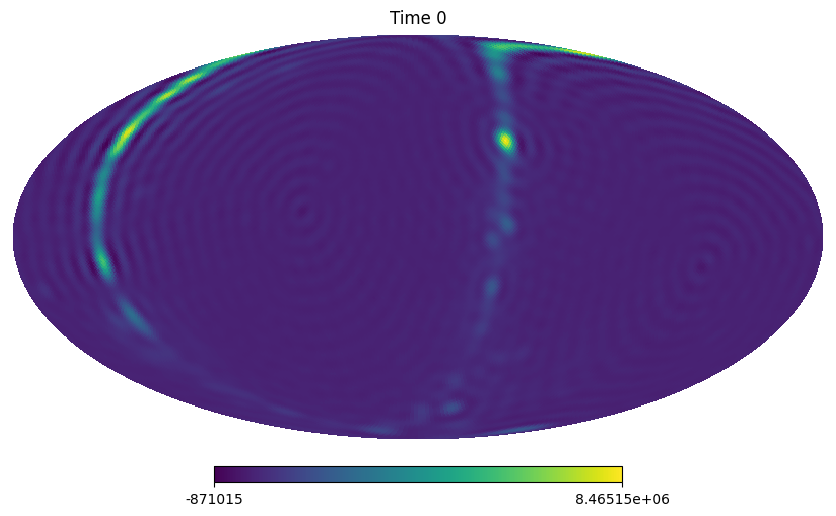

In [58]:
sim = fd.faraday.Simulator(beam, sky, center_freq=CENTER_FREQ)
sim.run(ntimes=1)
sim.channelize(bins="narrow")

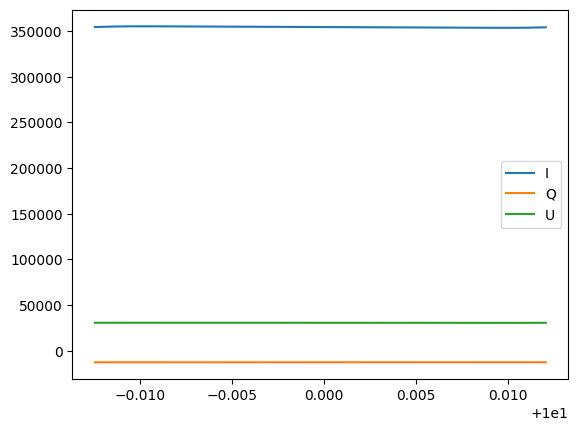

In [59]:
sim.vis2stokes()

plt.figure()
for k, v in sim.stokes.items():
    plt.plot(freq, v.mean(axis=0), label=k)
plt.legend()
plt.show()

Running time 1/1, 2.0275026443753323 rad


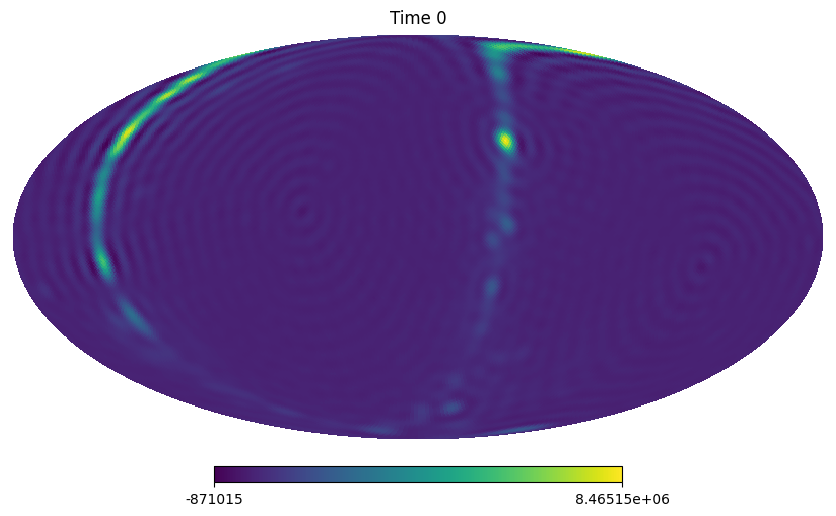

In [60]:
# faraday

sky_fd = load_sky(sim_freq, faraday=True, rm=f_depth)

sim_fd = fd.faraday.Simulator(beam, sky_fd, center_freq=CENTER_FREQ)
sim_fd.run(ntimes=1)
sim_fd.channelize(bins="narrow")

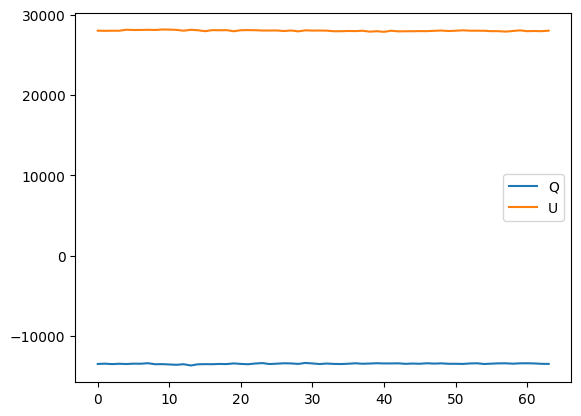

In [61]:
sim_fd.vis2stokes()

plt.figure()
for k, v in sim_fd.stokes.items():
    if k == "I":
        continue
    plt.plot(v[0], label=k)
plt.legend()
plt.show()

0.4587747244948414
-2.3312367274586823
1.0493730550599374


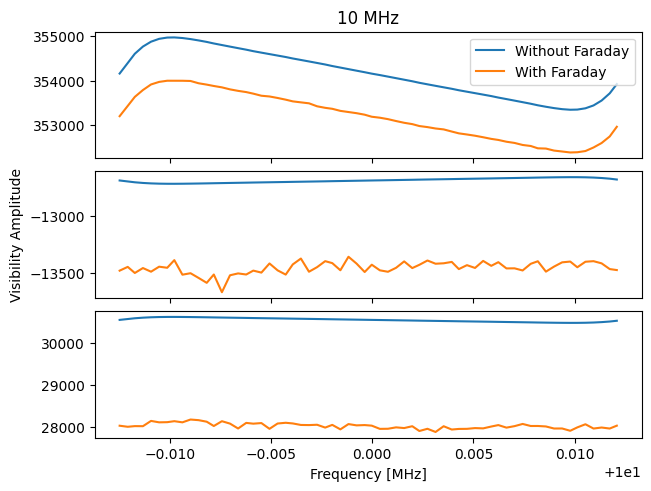

In [62]:
fig, axs = plt.subplots(nrows=3, sharex=True, constrained_layout=True)
for ax, pol in zip(axs, ["I", "Q", "U"]):
    stoke = sim.stokes[pol].mean(axis=0)
    stoke_fd = sim_fd.stokes[pol].mean(axis=0)
    ax.plot(freq, stoke, label="Without Faraday")
    ax.plot(freq, stoke_fd, label="With Faraday")
    if pol == "I":
        ax.legend()
        ax.set_title("10 MHz")
    print(100 * (np.max(stoke_fd) - np.min(stoke_fd)) / np.mean(stoke_fd))
    if pol == "Q":
        ax.set_ylabel("Visibility Amplitude")
    if pol == "U":
        ax.set_xlabel("Frequency [MHz]")
plt.show()